In [200]:
from abc import ABCMeta, abstractmethod

In [201]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def add(self, other):
        pass
    @abstractmethod
    def scale(self, scalar):
        pass
    @property
    @abstractmethod
    def zero():
        pass
    def __neg__(self):
        return self.scale(-1)
    def subtract(self, other):
        return self.add(-1 * other)
    def __sub__(self, other):
        return self.subtract(other)
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __truediv__(self, div):
        return self.scale(1.0/div)

In [202]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def zero(self):
        return Vec2(0,0)
    def add(self, v2):
        assert self.__class__ == v2.__class__
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.__class__ == other.__class__ and self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [203]:
v = Vec2(3,4)
w = v.add(Vec2(-2,6))

In [204]:
print(w.x)

1


In [205]:
Vec2(1,1).scale(0.5).x

0.5

In [206]:
Vec2(3,4) == Vec2(3,4)

True

In [207]:
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

Vec2(3.0,4.0)

In [208]:
class Vec3(Vector):
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
    def zero(self):
        return Vec3(0,0,0)
    def add(self, v3):
        assert self.__class__ == v3.__class__
        return Vec3(self.x + v3.x, self.y + v3.y, self.z + v3.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self, other):
        return (self.__class__ == other.__class__ 
            and self.x == other.x 
            and self.y == other.y 
            and self.z == other.z)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

In [209]:
2.0 * (Vec3(1,0,0) + Vec3(0,1,0))

Vec3(2.0,2.0,0.0)

In [210]:
def average(v1,v2):
    return 0.5 * v1 + 0.5 * v2

In [211]:
average(Vec2(9.0,1.0),Vec2(8.0,6.0))

Vec2(8.5,3.5)

In [212]:
average(Vec3(1,2,3),Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

In [213]:
Vec2(1,3) - Vec2(5,1)

Vec2(-4,2)

In [214]:
from random import uniform

In [215]:
def random_scalar():
    return uniform(-10,10)

In [216]:
def random_vec2():
    return Vec2(random_scalar(), random_scalar())

In [217]:
a = random_scalar()

In [218]:
u, v = random_vec2(), random_vec2()

In [219]:
# below assert throws an AssertionError
# assert a * (u + v) == a * u + a * v

In [220]:
from math import isclose

In [221]:
def approx_equal_vec2(v,w):
    return isclose(v.x,w.x) and isclose(v.y,w.y)

In [222]:
for _ in range(0,100):
    a = random_scalar()
    u, v = random_vec2(), random_vec2()
    assert approx_equal_vec2(a * (u + v), a * u + a * v)

In [223]:
def test(eq, a, b, u, v, w, zero):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)

In [224]:
for i in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a, b, u, v, w, u.zero())

In [225]:
from vectors import add, scale

In [226]:
class CoordinateVector(Vector):
    @property
    @abstractmethod
    def dimension(self):
        pass
    def __init__(self, *coordinates):
        self.coordinates = tuple(c for c in coordinates)
    def zero(self):
        return self.__class__(*tuple(0 for _ in self.coordinates))
    def add(self, other):
        assert self.__class__ == other.__class__
        return self.__class__(*add(self.coordinates, other.coordinates))
    def scale(self, scalar):
        return self.__class__(*scale(scalar, self.coordinates))
    def __repr__(self):
        return "{},{}".format(self.__class__.__qualname__, self.coordinates)

In [227]:
class Vec6(CoordinateVector):
    def dimension(self):
        return 6

In [228]:
Vec6(1,2,3,4,5,6) + Vec6(1,2,3,4,5,6)

Vec6,(2, 4, 6, 8, 10, 12)

In [229]:
(Vec6(1,2,3,4,5,6) + Vec6(1,2,3,4,5,6)).zero()

Vec6,(0, 0, 0, 0, 0, 0)

In [230]:
# negation overload __neg__
-(Vec6(1,2,3,4,5,6) + Vec6(1,2,3,4,5,6))

Vec6,(-2, -4, -6, -8, -10, -12)

In [231]:
def approx_equal_vec3(v,w):
    return isclose(v.x,w.x) and isclose(v.y,w.y) and (v.z,w.z)

In [232]:
def random_vec3():
    return Vec3(random_scalar(), random_scalar(), random_scalar())

In [233]:
for i in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec3(), random_vec3(), random_vec3()
    test(approx_equal_vec3, a, b, u, v, w, u.zero())

In [234]:
Vec2(1,2)/2

Vec2(0.5,1.0)

In [235]:
class Vec1(Vector):
    def __init__(self, x):
        self.x = x
    def add(self, other):
        return Vec1(self.x + other.x)
    def scale(self, scalar):
        return Vec1(scalar * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self, other):
        return self.__class__ == other.__class__ and self.x == other.x
    def __repr__(self):
        return "Vec1({})".format(self.x)

In [236]:
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

In [237]:
def f(x):
    return 0.5 * x + 3

In [238]:
def g(x):
    return sin(x)

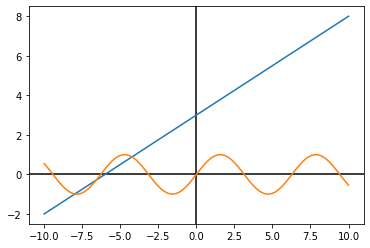

In [239]:
plot([f,g], -10, 10)

In [240]:
def add_functions(f,g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

In [241]:
fg = add_functions(f,g)

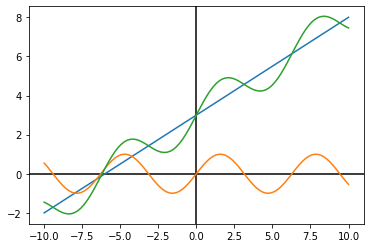

In [242]:
plot([f,g,fg], -10, 10)

In [243]:
def scale_function(g, scalar):
    def new_function(x):
        return g(x) * scalar
    return new_function

In [244]:
g3 = scale_function(g,3)

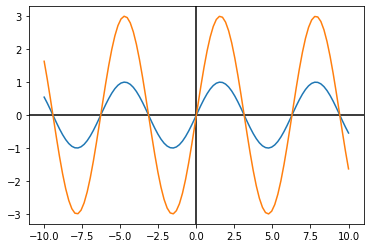

In [245]:
plot([g,g3],-10,10)

In [246]:
class Matrix5_by_3(Vector):
    rows = 5
    cols = 3
    def __init__(self, matrix):
        self.matrix = matrix
    def add(self, other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a,b in zip(row1,row2))
            for (row1,row2) in zip(self.matrix, other.matrix)
        ))
    def scale(self, scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))
    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple(
            tuple(0 for j in range(0, cls.columns))
            for _ in range(0, cls.rows)
        ))

In [247]:
from PIL import Image

In [248]:
class ImageVector(Vector):
    size = (300,300)
    def __init__(self, input):
        try:
            img = Image.open(input).resize(ImageVector.size)
            self.pixels = img.getdata()
        except:
            self.pixels = input
    def image(self):
        img = Image.new('RGB', ImageVector.size)
        img.putdata([(int(r), int(g), int(b)) for (r,g,b) in self.pixels])
        return img
    def add(self, img2):
        return ImageVector([r1+r2,g1+g2,b1+b2] for ((r1,g1,b1),(r2,g2,b2)) in zip(self.pixels, img2.pixels))
    def scale(self, scalar):
        return ImageVector([(scalar*r, scalar*g, scalar*b) for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls):
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0, total_pixels)])
    def _repr_png_(self):
        return self.image()._repr_png_()

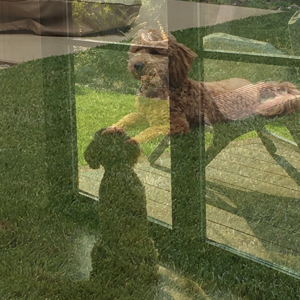

In [249]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

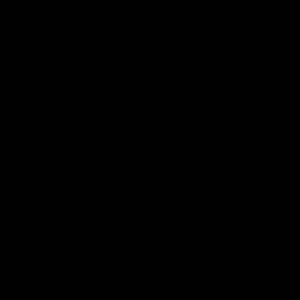

In [250]:
-ImageVector("inside.JPG")

In [251]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])

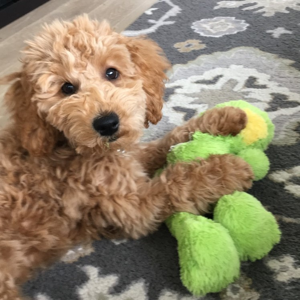

In [252]:
ImageVector("melba_toy.JPG")

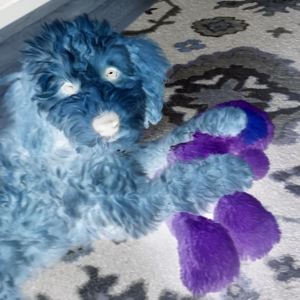

In [253]:
white - ImageVector("melba_toy.JPG")

In [254]:
for i in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_scalar(), random_scalar(), random_scalar()
    test(lambda x,y: isclose(x,y), a, b, u, v, w, 0)

In [255]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

In [256]:
from random import uniform, random, randint
from datetime import datetime, timedelta

In [257]:
def random_time():
    return CarForSale.retrieved_date - timedelta(days=uniform(0,10))

def approx_equal_time(t1,t2):
    test = datetime.now()
    return isclose((test-t1).total_seconds(),(test-t2).total_seconds())

def random_car():
    return CarForSale(randint(1990,2019), randint(0,250000), 27000. * random(), random_time())

def approx_equal_car(c1,c2):
    return(isclose(c1.model_year, c2.model_year)
           and isclose(c1.mileage, c2.mileage)
           and isclose(c1.price, c2.price)
           and approx_equal_time(c1.posted_datetime, c2.posted_datetime)
    )

In [258]:
for i in range(0,100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_car(), random_car(), random_car()
    test(approx_equal_car, a, b, u, v, w, CarForSale.zero())

In [259]:
class Function(Vector):
    def __init__(self,func):
        self.func = func
    def __call__(self,x):
        return self.func(x)
    def add(self, other):
        def new_function(x):
            return self.func(x) + other.func(x)
        return new_function
    def scale(self, scalar):
        def new_function(x):
            return self.func(x) * scalar
        return new_function
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)

In [260]:
f = Function(f)
g = Function(g)

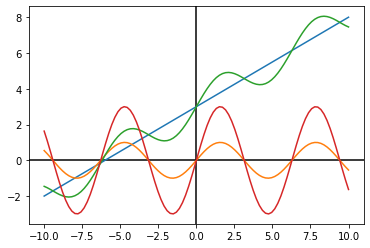

In [261]:
plot([f,g,f+g,3*g], -10, 10)

In [262]:
class Function(Vector):
    def __init__(self,func):
        self.func = func
    def __call__(self,x):
        return self.func(x)
    def add(self, other):
        return Function(lambda x: self.func(x) + other.func(x))
    def scale(self, scalar):
        return Function(lambda x: scalar * self.func(x))
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)

In [263]:
f = Function(lambda x: 0.5 * x + 3)
g = Function(sin)

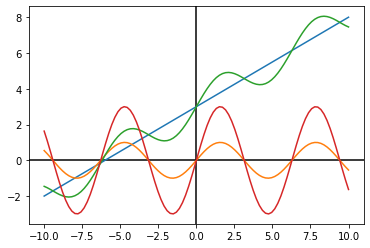

In [264]:
plot([f,g,f+g,3*g], -10, 10)

In [265]:
class Function2(Vector):
    def __init__(self,func):
        self.func = func
    def __call__(self,*args):
        return self.func(*args)
    def add(self, other):
        return Function2(lambda x,y: self.func(x,y) + other.func(x,y))
    def scale(self, scalar):
        return Function2(lambda x,y: scalar * self.func(x,y))
    @classmethod
    def zero(cls):
        return Function2(lambda x,y: 0)

In [266]:
f = Function2(lambda x,y: x+y)
g = Function2(lambda x,y: x-y+1)

In [267]:
(f+g)(3,10)

7

In [268]:
class Matrix(Vector):
    @property
    @abstractmethod
    def rows(self):
        pass
    @property
    @abstractmethod
    def columns(self):
        pass
    def __init__(self,entries):
        self.entries = entries
    def add(self, other):
        return self.__class__(tuple(
            tuple(self.entries[i][j] + other.entries[i][j] for j in range(0,self.columns()))
            for i in range(0,self.rows())
        ))
    def scale(self, scalar):
        return self.__class__(tuple(
            tuple(n * scalar for n in row)
            for row in self.entries
        ))
    def zero(self):
        return self.__class__(tuple(
            tuple(0 for i in range(0,self.columns()))
            for j in range(0,self.rows())
        ))
    def __repr__(self):
        return "%s%r" % (self.__class__.__qualname__, self.entries)

In [269]:
class Matrix2_by_2(Matrix):
    def rows(self):
        return 2
    def columns(self):
        return 2

In [270]:
2 * Matrix2_by_2(((1,2),(3,4))) + Matrix2_by_2(((1,2),(3,4)))

Matrix2_by_2((3, 6), (9, 12))

In [271]:
def approx_equal_matrix(v,w):
    results = [isclose(v.entries[i][j],w.entries[i][j]) for j in range(0,v.columns()) for i in range(0,v.rows())]
    for r in results:
        if r == False:
            return false
    return True

In [272]:
class Matrix5_by_3(Matrix):
    def rows(self):
        return 5
    def columns(self):
        return 3

def random_matrix5_by_3():
    return Matrix5_by_3(tuple(
        tuple(random_scalar() for _ in range(0,3))
        for _ in range(0,5)
    ))

In [273]:
for i in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_matrix5_by_3(), random_matrix5_by_3(), random_matrix5_by_3()
    test(approx_equal_matrix, a, b, u, v, w, u.zero())

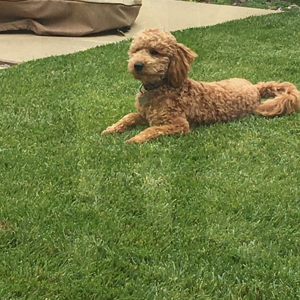

In [274]:
0.1 * ImageVector("inside.JPG") + (1-0.1) * ImageVector("outside.JPG")

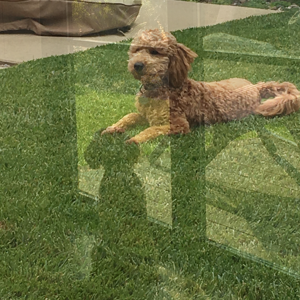

In [275]:
0.3 * ImageVector("inside.JPG") + (1-0.3) * ImageVector("outside.JPG")

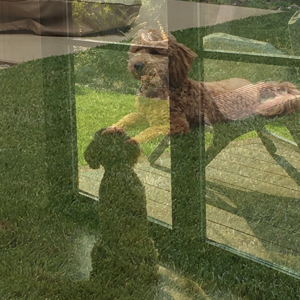

In [276]:
0.5 * ImageVector("inside.JPG") + (1-0.5) * ImageVector("outside.JPG")

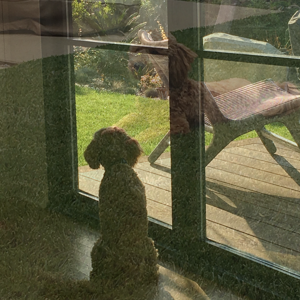

In [277]:
0.7 * ImageVector("inside.JPG") + (1-0.7) * ImageVector("outside.JPG")

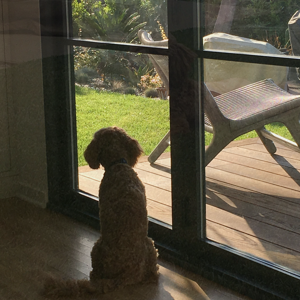

In [278]:
0.9 * ImageVector("inside.JPG") + (1-0.9) * ImageVector("outside.JPG")

In [279]:
def random_color():
    return (randint(0,256), randint(0,256), randint(0,256))

In [280]:
def random_image300_by_300():
    return ImageVector([random_color() for _ in range(0,300*300)])

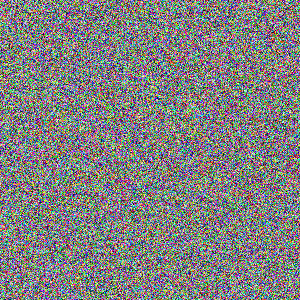

In [281]:
random_image300_by_300()

In [282]:
def approx_equal_image(i1,i2):
    return all([isclose(c1,c2)]
        for p1,p2 in zip(i1.pixels,i2.pixels)
        for c1,c2 in zip(p1,p2)
    )

In [283]:
#for i in range(0, 100):
#    a, b = random_scalar(), random_scalar()
#    u, v, w = random_image300_by_300(), random_image300_by_300(), random_image300_by_300()
#    test(approx_equal_image, a, b, u, v, w, ImageVector.zero())

In [284]:
class LinearFunction(Vec2):
    def __call__(self, input):
        return self.x * input + self.y

In [285]:
LinearFunction(2,0)

Vec2(2,0)

In [286]:
LinearFunction(2,0)(2)

4

In [287]:
class QuadraticFunction(Vector):
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    def add(self,v):
        return QuadraticFunction(self.a + v.a, self.b + v.b, self.c + v.c)
    def scale(self,scalar):
        return QuadraticFunction(self.a * scalar, self.b * scalar, self.c * scalar)
    def __call__(self,x):
        return self.a * x * x + self.b * x + self.c
    @classmethod
    def zero(cls):
        return QuadraticFunction(0,0,0)

In [288]:
QuadraticFunction(1,2,3)(2)

11

In [289]:
class Polynomial(Vector):
    def __init__(self,*coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for power,coefficient in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

In [290]:
def solid_color(r,g,b):
    return ImageVector([(r,g,b) for _ in range(0,300*300)])

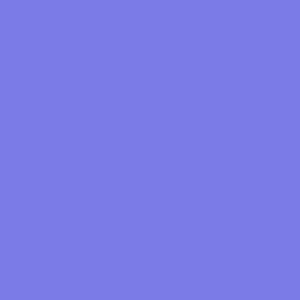

In [291]:
solid_color(123,123,231)

In [292]:
image_size = (300,300)
total_pixels = image_size[0] * image_size[1]
square_count = 30
square_width = 10

In [293]:
def ij(n):
    return (n // image_size[0], n % image_size[1])

In [294]:
def to_lowres_grayscale(img):
    matrix = [
        [0 for i in range(0,square_count)]
        for j in range(0,square_count)
    ]
    for (n,p) in enumerate(img.pixels):
        i,j = ij(n)
        weight = 1.0 / (3 * square_width * square_width)
        matrix[i // square_width][j // square_width] += (sum(p) * weight)
    return matrix

In [295]:
def from_lowres_grayscale(matrix):
    def lowres(pixels, ij):
        i,j = ij
        return pixels[i // square_width][j // square_width]
    def make_highres(limg):
        pixels = list(matrix)
        triple = lambda x: (x,x,x)
        return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0,total_pixels)])
    return make_highres(matrix)

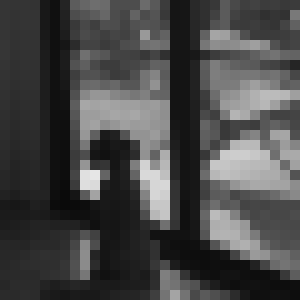

In [296]:
from_lowres_grayscale(to_lowres_grayscale(ImageVector("inside.JPG")))